## III. Data Visualizations 

The aim of this notebook is to show some visualization of the existing data set.

The information is presented as follows:

1. General Data Exploration: Existing relationships between dataset
2. Label Exploration
    * Exploring relationships between label and numerical features
    * xploring relationships between label and categorical features 
    * Using Aesthetics to explore relationships between label and numerical/categorical features

Note: Dataset used in this file results from data wrangling undertaken on jupter notebook 1 of this project.
      Features (numerical) have been selected from jupyter notebook 2 of these project, as those with highest predicting power
 

In [1]:
# import libraries
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline
%matplotlib inline

In [2]:
#import data set modiied data set from file Data Preparation(train)
df=pd.read_csv('dfvisualizations.csv')
df.shape

(3198, 34)

### 1.  General Data Exploration

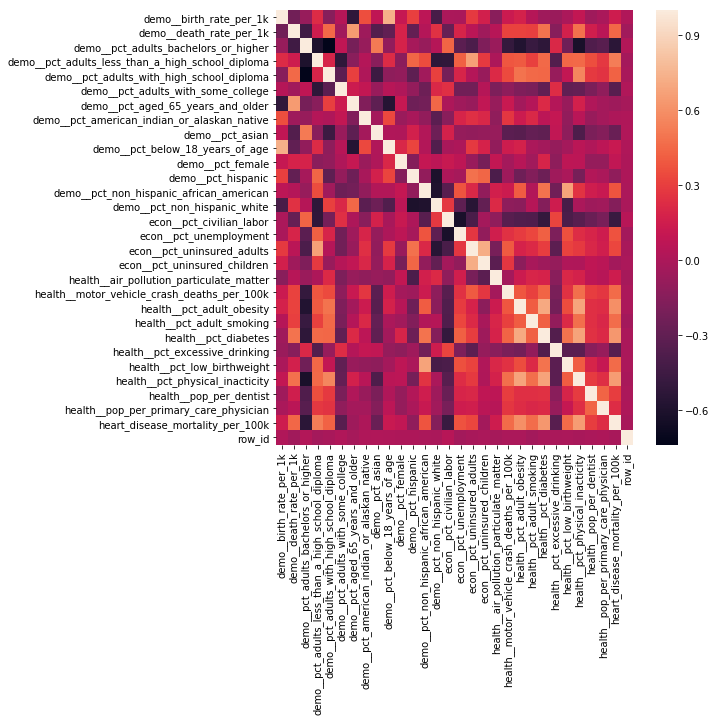

In [3]:
# Let's observe the existing correlations between dataset
plt.figure(figsize=(8,8)) 

sns.heatmap(df.corr())

This chart shows some very interesting correlations, such as product type and warranty, failure rate and product_type:essence, or failure_rate and warranty_years_1


### 2. Label Exploration

In [4]:
## Descriptive statistics for label (in this case it will be attractiveness)
df.heart_disease_mortality_per_100k.describe()

count    3198.000000
mean      279.369293
std        58.953338
min       109.000000
25%       237.000000
50%       275.000000
75%       317.000000
max       512.000000
Name: heart_disease_mortality_per_100k, dtype: float64

From the describe statistics, it looks like data follows a normal distribution shape, we'll check it soon

(array([ 10.,  20., 108., 311., 495., 582., 520., 454., 305., 195., 121.,
         41.,  21.,  13.,   2.]),
 array([109.        , 135.86666667, 162.73333333, 189.6       ,
        216.46666667, 243.33333333, 270.2       , 297.06666667,
        323.93333333, 350.8       , 377.66666667, 404.53333333,
        431.4       , 458.26666667, 485.13333333, 512.        ]),
 <a list of 15 Patch objects>)

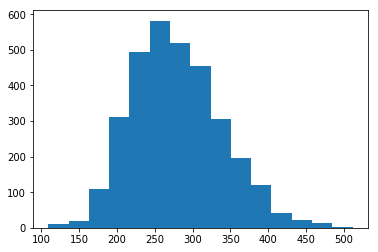

In [5]:
plt.hist(df.heart_disease_mortality_per_100k,15)


Label histogram shows data for this column is slightly left-skewed, but overall it follows a normal distribution shape.

In [6]:
df.head(2)

,area__rucc,area__urban_influence,demo__birth_rate_per_1k,demo__death_rate_per_1k,demo__pct_adults_bachelors_or_higher,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_aged_65_years_and_older,demo__pct_american_indian_or_alaskan_native,...,health__pct_adult_smoking,health__pct_diabetes,health__pct_excessive_drinking,health__pct_low_birthweight,health__pct_physical_inacticity,health__pop_per_dentist,health__pop_per_primary_care_physician,heart_disease_mortality_per_100k,row_id,yr
0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,12.0,12.0,0.154382,0.194223,0.424303,0.227092,0.176,0.004,...,0.23,0.131,0.147,0.089,0.332,1650.0,1489.0,312,0,a
1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,19.0,7.0,0.259372,0.164134,0.234043,0.342452,0.101,0.008,...,0.19,0.090,0.181,0.082,0.265,2010.0,2480.0,257,1,a


#### 2.1 Exploring relationships between label and numerical features

Initially, we shall examine the correlation between the most relevant numeric features and the lable. The features have been identified from the best performing model (see jupyter notebook 2 in this project). 


C:\Users\Florence\Anaconda333\envs\xebiamow\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


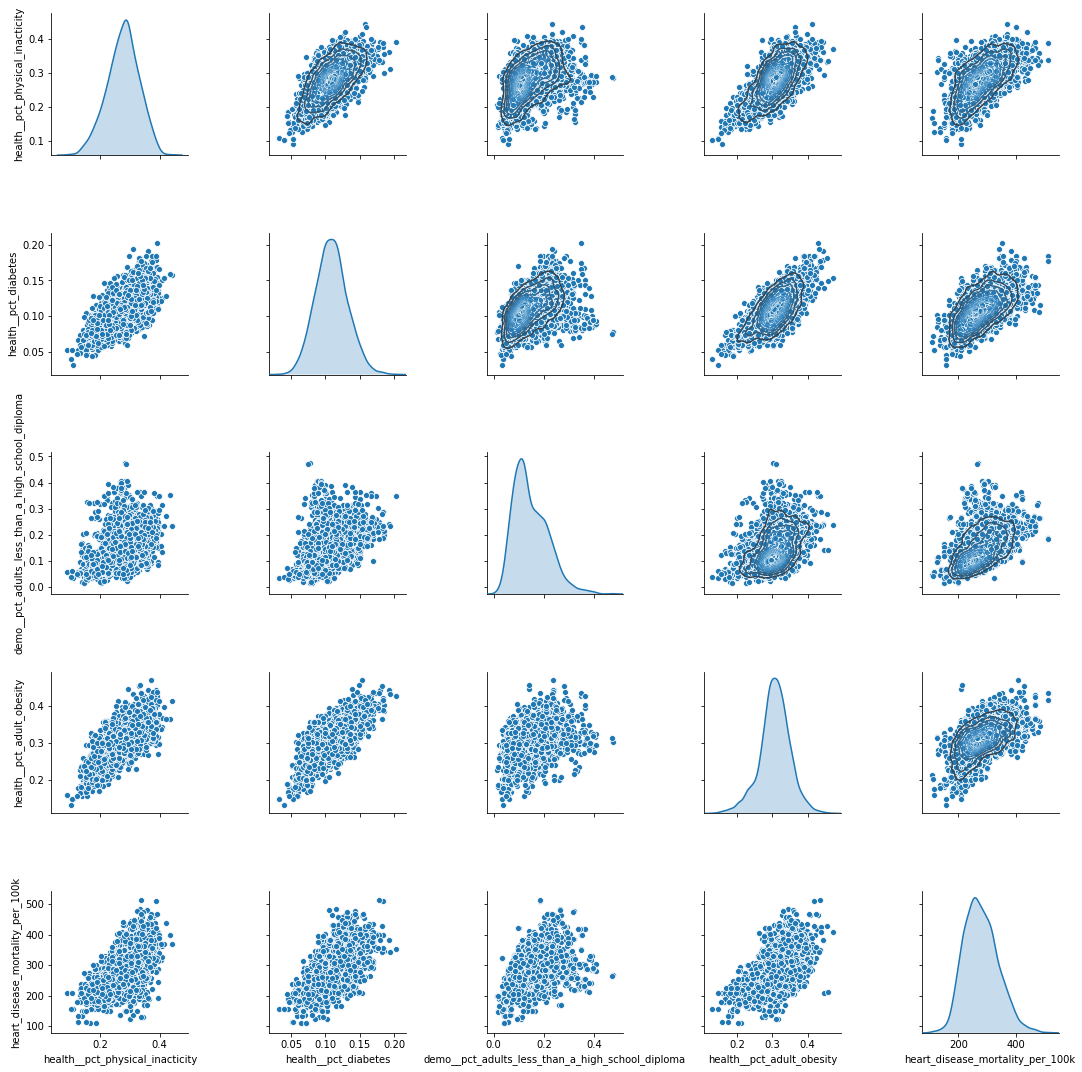

In [7]:
## Create scatter-plot matrix of most important correlations with the label

num_cols1 = ["health__pct_physical_inacticity", "health__pct_diabetes",
            "demo__pct_adults_less_than_a_high_school_diploma", "health__pct_adult_obesity","heart_disease_mortality_per_100k"] 
sns.pairplot(df[num_cols1], diag_kind="kde", size=3).map_upper(sns.kdeplot, cmap="Blues_d")

Clearly plots above show a positive correlation between all features. Some of them, like the relationship between the Adult Obesity and the Health percentage of diabetes display more linear correlation than others. 
When looking at the most right column, we shall see correlation between these numerical features and the label is also positive. 

#### 2.2 Exploring relationships between label and categorical features

In [8]:
df.dtypes

area__rucc                                           object
area__urban_influence                                object
demo__birth_rate_per_1k                             float64
demo__death_rate_per_1k                             float64
demo__pct_adults_bachelors_or_higher                float64
demo__pct_adults_less_than_a_high_school_diploma    float64
demo__pct_adults_with_high_school_diploma           float64
demo__pct_adults_with_some_college                  float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_below_18_years_of_age                     float64
demo__pct_female                                    float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
econ__economic_typology                 

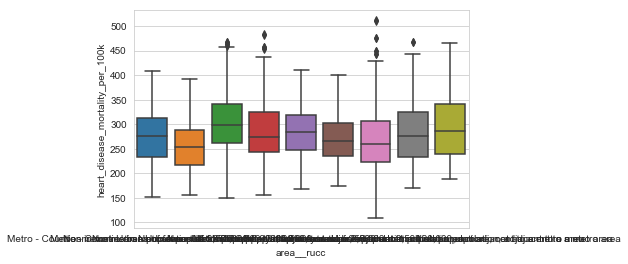

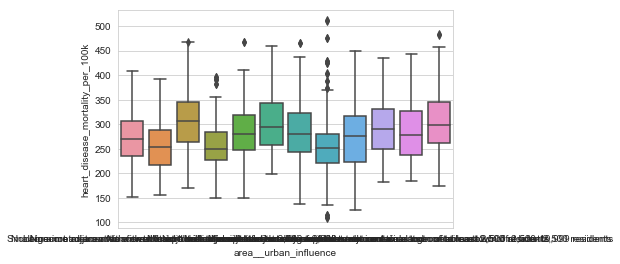

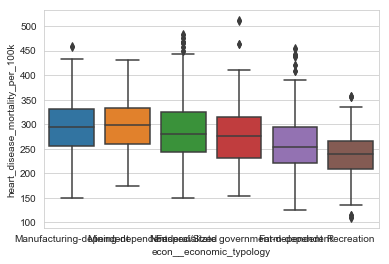

In [9]:
def plot_box(df, cols, col_y='heart_disease_mortality_per_100k'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()
        
cat_cols = ['area__rucc', 'area__urban_influence','econ__economic_typology']
plot_box(df, cat_cols)   

When observing the relationship between the label and the categorical variables, we can see that

*  **Median** changes considerably between boxplots of the same category
* **Boxplotsize** shows certain overlapping between categories, while some of them are clearly distinct from others
    

In [10]:
#Create new 2 categorical columns by splitting one
def demo__pct_aged_65_years_and_older_xform(al):
    if al > 0.2: return 'old'
    else: return 'young'

df["young_old_pop"] = df['demo__pct_aged_65_years_and_older'].map(demo__pct_aged_65_years_and_older_xform)


df['young_old_pop'].value_counts()

young    2535
old       663
Name: young_old_pop, dtype: int64

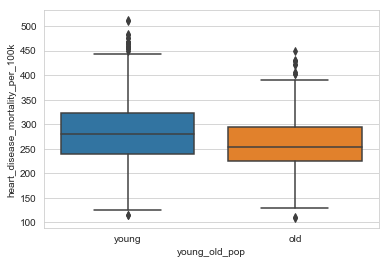

In [11]:
def plot_box(df, cols, col_y='heart_disease_mortality_per_100k'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()
        
cat_cols = ['young_old_pop']
plot_box(df, cat_cols)

Surprisingly, younger population seem to suffer higher rate of mortality due to heart diseas than elder population

#### 2.3 Using Aesthetics to explore relationships between label and numerical/categorical features

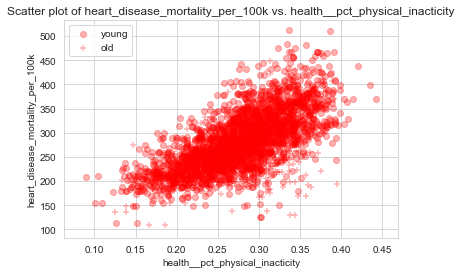

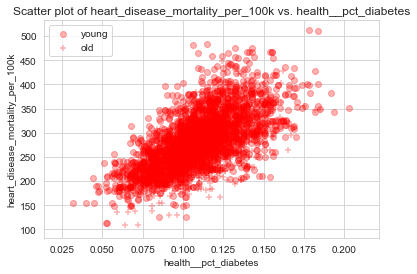

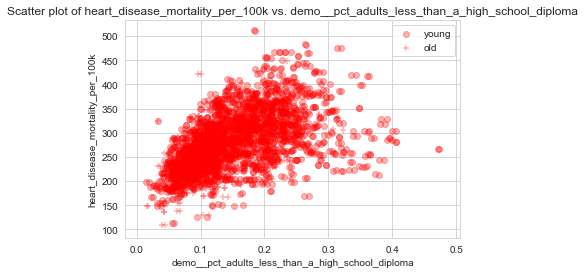

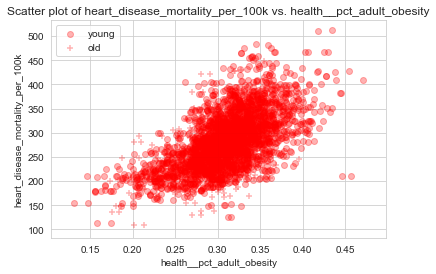

In [12]:
def plot_scatter_shape(df, cols, shape_col = 'young_old_pop', col_y = 'heart_disease_mortality_per_100k', alpha = 0.3):
    shapes = ['o', '+', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = df[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = df[df[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'red')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ["health__pct_physical_inacticity", "health__pct_diabetes",
            "demo__pct_adults_less_than_a_high_school_diploma", "health__pct_adult_obesity"]
plot_scatter_shape(df, num_cols) 

Using aesthetics, we can visualize and better understand data:

Clearly, in all these plots, we can see the circles (young people) are placed in higher positions than older people. Thus confirming that younger people (aged below 65) experience a higher percentage of mortal heart diseases.
    